In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score
import itertools

In [20]:
df = pd.read_csv(r"dataR2.csv")

In [21]:
#df["Classification"] = df["Classification"].apply(lambda x: 0 if x == 1 else x)

In [22]:
#df["Classification"] = df["Classification"].apply(lambda x: 1 if x == 2 else x)

In [23]:
df["Classification"]

0      1
1      1
2      1
3      1
4      1
      ..
111    2
112    2
113    2
114    2
115    2
Name: Classification, Length: 116, dtype: int64

In [24]:
def przypisz_zero_lub_jeden(x):
    if x == 1:
        return 0
    if x == 2:
        return 1

In [25]:
df["Classification"] = df["Classification"].apply(przypisz_zero_lub_jeden)

In [28]:
df["Classification"]

0      0
1      0
2      0
3      0
4      0
      ..
111    1
112    1
113    1
114    1
115    1
Name: Classification, Length: 116, dtype: int64

In [29]:
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,1
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,1
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,1
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,1


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [18]:
df

array([[3.69230769e-01, 2.53850329e-01, 7.09219858e-02, ...,
        6.06648498e-02, 2.24659127e-01, 0.00000000e+00],
       [9.07692308e-01, 1.14826180e-01, 2.26950355e-01, ...,
        1.08258334e-02, 2.55926278e-01, 0.00000000e+00],
       [8.92307692e-01, 2.35277707e-01, 2.19858156e-01, ...,
        7.69064520e-02, 3.07911729e-01, 0.00000000e+00],
       ...,
       [6.30769231e-01, 6.76934210e-01, 2.62411348e-01, ...,
        9.02522500e-02, 1.62294256e-01, 1.00000000e+00],
       [7.38461538e-01, 3.57270833e-01, 1.56028369e-01, ...,
        7.60552668e-04, 2.09740790e-01, 1.00000000e+00],
       [9.53846154e-01, 4.35949590e-01, 5.53191489e-01, ...,
        1.44505007e-02, 2.67742226e-02, 1.00000000e+00]])

In [30]:
X = df.drop(columns="Classification")
y = df.loc[:, "Classification"]

In [54]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=10)
train_X, test_X, train_y, test_y = train_test_split(StandardScaler().fit_transform(X), y, test_size=0.2, random_state=10)



C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [55]:
#train_X = scaler.fit_transform(train_X)


In [62]:
clf = LogisticRegression(class_weight="balanced")


In [63]:
clf.fit(train_XX, train_y)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [64]:
predicted_y = clf.predict(train_X)


In [65]:
predicted_y

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [66]:
clf.predict_proba(train_X)[:,1]

array([0.05078012, 0.01463236, 0.57990497, 0.376282  , 0.47950714,
       0.44568321, 0.11770698, 0.5844146 , 0.19489603, 0.53950699,
       0.06662328, 1.        , 0.12334219, 0.51365301, 0.86710376,
       0.73813356, 0.97336868, 0.53334284, 0.2359788 , 0.06417483,
       0.03265548, 0.12331994, 0.96108041, 0.71355543, 0.1157622 ,
       0.99921495, 0.18470702, 0.04459746, 0.20867923, 0.9500302 ,
       0.66797921, 0.44019401, 0.13933298, 0.30983677, 0.17006713,
       0.23770687, 0.07349154, 0.1322803 , 0.32932616, 0.05862993,
       0.569161  , 0.13164408, 0.61491401, 0.31813909, 0.26102916,
       0.93061675, 0.99929095, 0.08667809, 0.98836508, 0.1439798 ,
       0.19459749, 0.07753706, 0.13741368, 0.042202  , 0.28690496,
       0.18980915, 0.61985818, 0.08252228, 0.66245049, 0.0479743 ,
       0.36763347, 0.58805446, 0.98952806, 0.02054025, 0.13171427,
       0.89072965, 0.5798369 , 0.603733  , 0.10177182, 0.17069191,
       0.99999991, 0.55921665, 0.29061803, 0.23581042, 0.99998

In [67]:
clf.predict_proba(train_X)[0]

array([0.94921988, 0.05078012])

In [69]:
prog_odciecia = 0.5
np.where(clf.predict_proba(train_X)[:,1] > prog_odciecia, 1, 0)

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0])

In [70]:
prog_odciecia = 0.5
predicted_y = np.where(clf.predict_proba(train_X)[:,1] > prog_odciecia, 1, 0) 
#próg odcięcia

In [71]:
conf = confusion_matrix(train_y, predicted_y)

In [72]:
conf

array([[36,  4],
       [24, 28]], dtype=int64)

In [73]:
conf[0][1]
print(classification_report(train_y, predicted_y)) #trafnosc na podstawie raportu

              precision    recall  f1-score   support

           0       0.60      0.90      0.72        40
           1       0.88      0.54      0.67        52

   micro avg       0.70      0.70      0.70        92
   macro avg       0.74      0.72      0.69        92
weighted avg       0.76      0.70      0.69        92



In [45]:
print(classification_report(train_y, predicted_y)) #trafnosc na podstawie raportu

              precision    recall  f1-score   support

           0       0.68      0.75      0.71        40
           1       0.79      0.73      0.76        52

    accuracy                           0.74        92
   macro avg       0.74      0.74      0.74        92
weighted avg       0.74      0.74      0.74        92



In [74]:
accuracy = (30 + 38) / (30+38 + 10 +14) #oblicznmy ręcznie 


In [75]:
round(accuracy,2)

0.74

In [76]:
#sensitivity = #TP/TP+FN
sensitivity= 30/ (30+10)

In [77]:
sensitivity

0.75

In [ ]:
#TP | FN
#FP | TN

In [ ]:
- koszt poprawnego zaklasyfikowania chorej osoby i natychmiastowej terapii wyniesie 48,477* #true_positive
- koszt poprawnego zaklasyfikowania osoby zdrowej wyniesie 0 #true_negative
- koszt niepoprawnego zaklasyfikowania chorej osoby jako zdrowej i znacznie późniejszego wykrycia nowotworu wyniesie 89,463*#false_positive
- koszt niepoprawnego zaklasyfikowania osoby zdrowej jako chorej i skierowania jej na dalsze testy wyniesie 751* #false_negative

In [ ]:
# funkcja ktora bierze matrix-a i obliczy koszty(return)
# petla for ktora bedzie nam wyznaczala rozne odciecia np od 0.2 do 0.8 -> skok 0.01 
# obliczamy koszty dla danego odciecia -> {40: 200000, 40.01: 200002}
# na podstawie dictionary chcemy znalezc min -> odp z tego da nam najlepsze odciecie


In [78]:
def oblicz_koszty(conf_matrix):
    suma = 0
    suma += conf_matrix[0][0] * 48477 
    suma += conf_matrix[1][0] * 89463
    suma += conf_matrix[0][1] * 751
    return suma

np.array([['TP', "FN"],['FP', "TN"]])
suma = oblicz_koszty(confusion_matrix(train_y, predicted_y))
print(suma)
    #TP | FN 
    #FP | TN

3895288


In [99]:
a = np.array([['TP', "FN"],['FP', "TN"]])
a[1][0]

'FP'

In [79]:
#lisete =[x for x in range(10)] #[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [80]:
def oblicz_predicted_y(prog_odciecia, train_X, clf):
    predicted_y = np.where(clf.predict_proba(train_X)[:,1] > prog_odciecia, 1, 0) 
    return predicted_y


In [93]:
suma_dla_progu = {}
for prog_odciecia in np.linspace(0.01, 0.99, num=300):
    prog_odciecia = round(prog_odciecia,4)
    predicted_y = oblicz_predicted_y(prog_odciecia, train_X, clf)
    print(prog_odciecia)
    print(confusion_matrix(train_y, predicted_y))
    suma = oblicz_koszty(confusion_matrix(train_y, predicted_y))
    suma_dla_progu[prog_odciecia] = suma
print(suma_dla_progu)
    
#TP | FN
#FP | TN

0.01
[[ 0 40]
 [ 0 52]]
0.0133
[[ 0 40]
 [ 0 52]]
0.0166
[[ 1 39]
 [ 1 51]]
0.0198
[[ 1 39]
 [ 1 51]]
0.0231
[[ 3 37]
 [ 1 51]]
0.0264
[[ 3 37]
 [ 1 51]]
0.0297
[[ 5 35]
 [ 1 51]]
0.0329
[[ 6 34]
 [ 1 51]]
0.0362
[[ 7 33]
 [ 1 51]]
0.0395
[[ 7 33]
 [ 1 51]]
0.0428
[[ 8 32]
 [ 1 51]]
0.0461
[[ 9 31]
 [ 1 51]]
0.0493
[[10 30]
 [ 1 51]]
0.0526
[[11 29]
 [ 1 51]]
0.0559
[[13 27]
 [ 1 51]]
0.0592
[[14 26]
 [ 1 51]]
0.0624
[[14 26]
 [ 1 51]]
0.0657
[[15 25]
 [ 1 51]]
0.069
[[15 25]
 [ 2 50]]
0.0723
[[15 25]
 [ 2 50]]
0.0756
[[16 24]
 [ 2 50]]
0.0788
[[17 23]
 [ 2 50]]
0.0821
[[17 23]
 [ 2 50]]
0.0854
[[18 22]
 [ 2 50]]
0.0887
[[18 22]
 [ 3 49]]
0.0919
[[18 22]
 [ 3 49]]
0.0952
[[18 22]
 [ 3 49]]
0.0985
[[18 22]
 [ 3 49]]
0.1018
[[20 20]
 [ 3 49]]
0.1051
[[20 20]
 [ 3 49]]
0.1083
[[20 20]
 [ 3 49]]
0.1116
[[20 20]
 [ 3 49]]
0.1149
[[20 20]
 [ 3 49]]
0.1182
[[21 19]
 [ 4 48]]
0.1214
[[21 19]
 [ 4 48]]
0.1247
[[22 18]
 [ 5 47]]
0.128
[[23 17]
 [ 5 47]]
0.1313
[[23 17]
 [ 6 46]]
0.1345
[[25 15]


In [94]:
import seaborn as sns
import pandas as pd

In [95]:
df_suma_kosztow = pd.DataFrame({"prog": suma_dla_progu.keys(), "suma":suma_dla_progu.values()} )

In [96]:
df_suma_kosztow.head(60)

,prog,suma
0,0.0100,30040
1,0.0133,30040
2,0.0166,167229
3,0.0198,167229
4,0.0231,262681
5,0.0264,262681
6,0.0297,358133
7,0.0329,405859
8,0.0362,453585
9,0.0395,453585


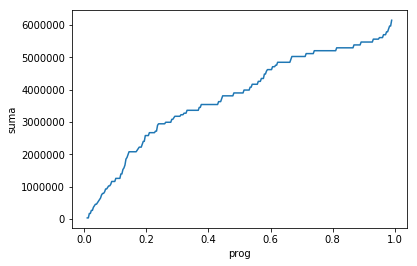

In [85]:
sns.lineplot(x=df_suma_kosztow['prog'], y= df_suma_kosztow['suma'])

In [ ]:
# bierzemy prog 0.2886 bo minimalizujemy bledy 2 stopnia ktore sa najbardziej kosztowne a jednoczesnie dostajemy dostatecznie duzo TP i TN


In [138]:
prog_odciecia = 0.3115
predicted_y = oblicz_predicted_y(prog_odciecia, train_X, clf)
print(prog_odciecia)
print(confusion_matrix(train_y, predicted_y))
suma = oblicz_koszty(confusion_matrix(train_y, predicted_y))


0.2886
[[19 21]
 [ 5 47]]


In [86]:
prog_odciecia = 0.3115
predicted_y = oblicz_predicted_y(prog_odciecia, train_X, clf)
print(prog_odciecia)
print(confusion_matrix(train_y, predicted_y))
suma = oblicz_koszty(confusion_matrix(train_y, predicted_y))


0.3115
[[35  5]
 [17 35]]


In [91]:
prog_odciecia = 0.1214
predicted_y = oblicz_predicted_y(prog_odciecia, train_X, clf)
print(prog_odciecia)
print(confusion_matrix(train_y, predicted_y))
suma = oblicz_koszty(confusion_matrix(train_y, predicted_y))

0.1214
[[21 19]
 [ 4 48]]


In [92]:
print(classification_report(train_y, predicted_y)) #trafnosc na podstawie raportu

              precision    recall  f1-score   support

           0       0.84      0.53      0.65        40
           1       0.72      0.92      0.81        52

   micro avg       0.75      0.75      0.75        92
   macro avg       0.78      0.72      0.73        92
weighted avg       0.77      0.75      0.74        92



In [87]:
print(classification_report(train_y, predicted_y)) #trafnosc na podstawie raportu

              precision    recall  f1-score   support

           0       0.67      0.88      0.76        40
           1       0.88      0.67      0.76        52

   micro avg       0.76      0.76      0.76        92
   macro avg       0.77      0.77      0.76        92
weighted avg       0.79      0.76      0.76        92



In [140]:

accuracy = (19 + 47) / (19 +47 + 21 +5) #oblicznmy ręcznie 
#sensitivity = #TP/TP+FN
sensitivity= 19 / (19 +21)
print(accuracy)
print(sensitivity)

0.717391304347826
0.475


### po obliczeniu nowego pogu odcięcia, który minimalizuje koszty dostajemy mniejszą trafność i dużo mniejszą czułość, ponieważ popełniamy więcej błędów 1 stopnia ale minimalizujemy błędy 2 stopnia